In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2004.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2004,17526,411,21,3512
1,2004,18010,136,34,3498
2,2004,17149,416,34,3531
3,2004,17364,143,24,3520
4,2004,17710,431,18,3543
...,...,...,...,...,...
1882,2004,17407,361,32,3518
1883,2004,17780,415,19,3542
1884,2004,17509,66,15,3552
1885,2004,17139,53,18,3563


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1887, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1887 non-null   int64
 1   Maximum length (m))  1887 non-null   int64
 2   Recession(m),        1887 non-null   int64
 3   Rate/yr(m)           1887 non-null   int64
 4   Snout altitude (m)   1887 non-null   int64
dtypes: int64(5)
memory usage: 73.8 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  71
Number  of instances of models:  1887


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2004,17526,411,21,3512
1,2004,18010,136,34,3498
2,2004,17149,416,34,3531
3,2004,17364,143,24,3520
4,2004,17710,431,18,3543


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0029,0.0005,0.0077
"Recession(m),",NaN,0.0029,1.0000,0.0467,-0.0237
Rate/yr(m),NaN,0.0005,0.0467,1.0000,0.0096
Snout altitude (m),NaN,0.0077,-0.0237,0.0096,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))   1.0000
Snout altitude (m)    0.0077
Recession(m),         0.0029
Rate/yr(m)            0.0005
Year                     NaN
Name: Maximum length (m)), dtype: float64

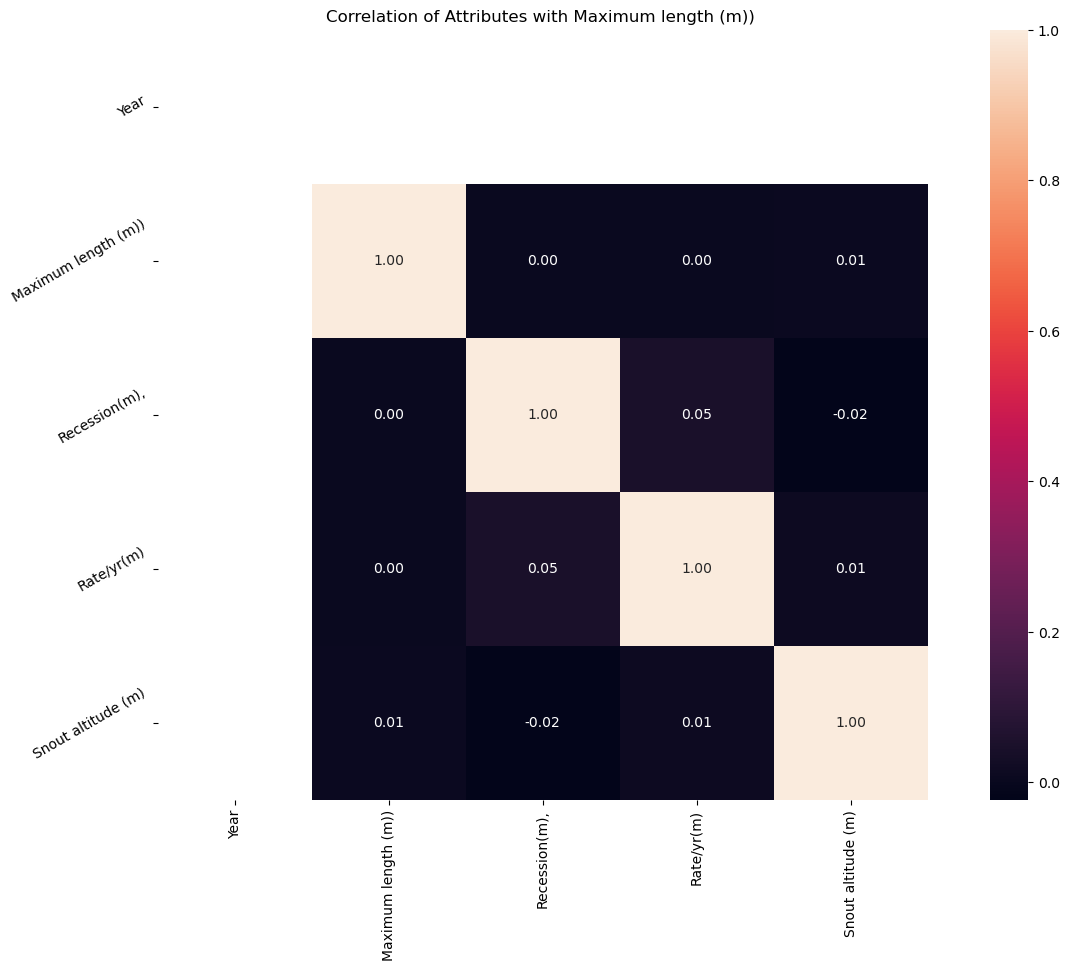

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,887.0000","1,887.0000","1,887.0000","1,887.0000","1,887.0000"
mean,"2,004.0000","17,553.3911",218.3498,27.1320,"3,531.4134"
std,0.0000,299.3265,124.7309,8.6748,20.3051
min,"2,004.0000","17,036.0000",0.0000,13.0000,"3,497.0000"
25%,"2,004.0000","17,296.0000",111.0000,20.0000,"3,514.0000"
50%,"2,004.0000","17,550.0000",217.0000,27.0000,"3,531.0000"
75%,"2,004.0000","17,813.0000",323.0000,35.0000,"3,549.0000"
max,"2,004.0000","18,067.0000",439.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2004   1.0000
Name: Year, dtype: float64

411   0.0058
53    0.0053
332   0.0053
213   0.0053
295   0.0053
       ...  
158   0.0005
21    0.0005
354   0.0005
22    0.0005
378   0.0005
Name: Recession(m),, Length: 428, dtype: float64

38   0.0435
13   0.0429
39   0.0424
18   0.0419
29   0.0392
20   0.0392
24   0.0371
23   0.0360
22   0.0360
19   0.0344
33   0.0339
21   0.0339
25   0.0329
16   0.0323
27   0.0323
30   0.0323
42   0.0318
14   0.0318
37   0.0318
26   0.0318
15   0.0302
17   0.0297
34   0.0297
31   0.0297
32   0.0281
28   0.0281
41   0.0281
35   0.0281
36   0.0276
40   0.0233
Name: Rate/yr(m), dtype: float64

3509   0.0201
3525   0.0201
3535   0.0191
3518   0.0191
3520   0.0185
        ...  
3566   0.0106
3564   0.0101
3504   0.0101
3543   0.0090
3541   0.0079
Name: Snout altitude (m), Length: 71, dtype: float64



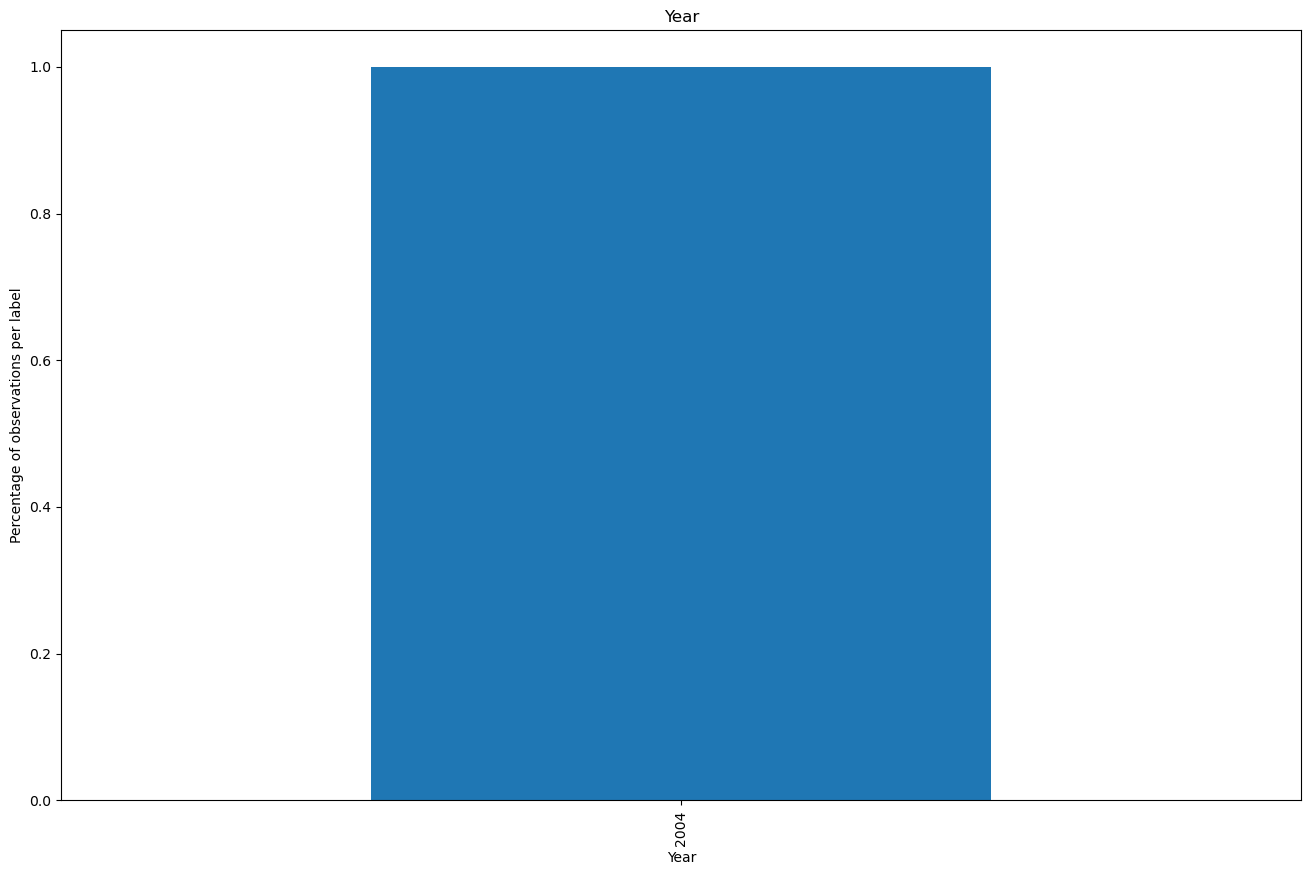

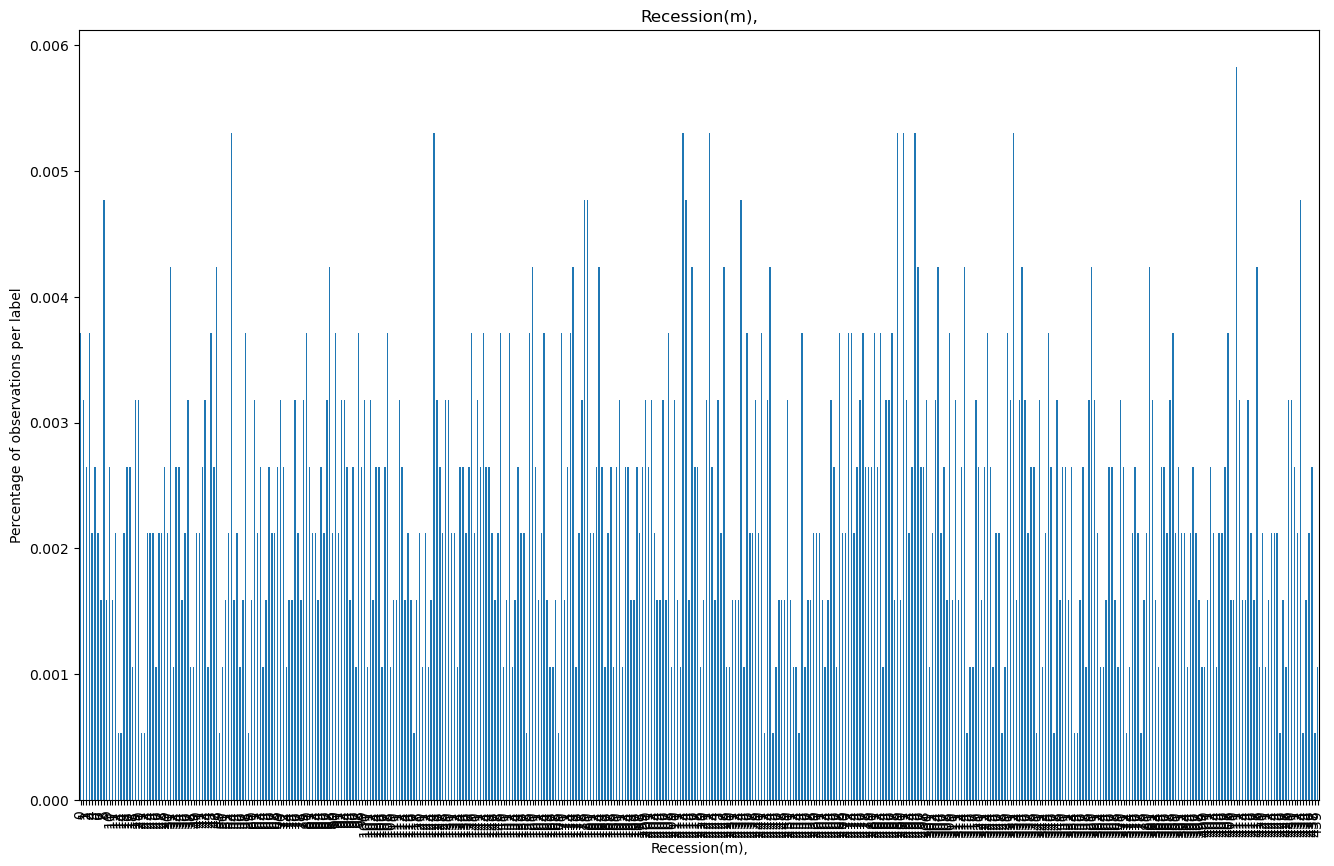

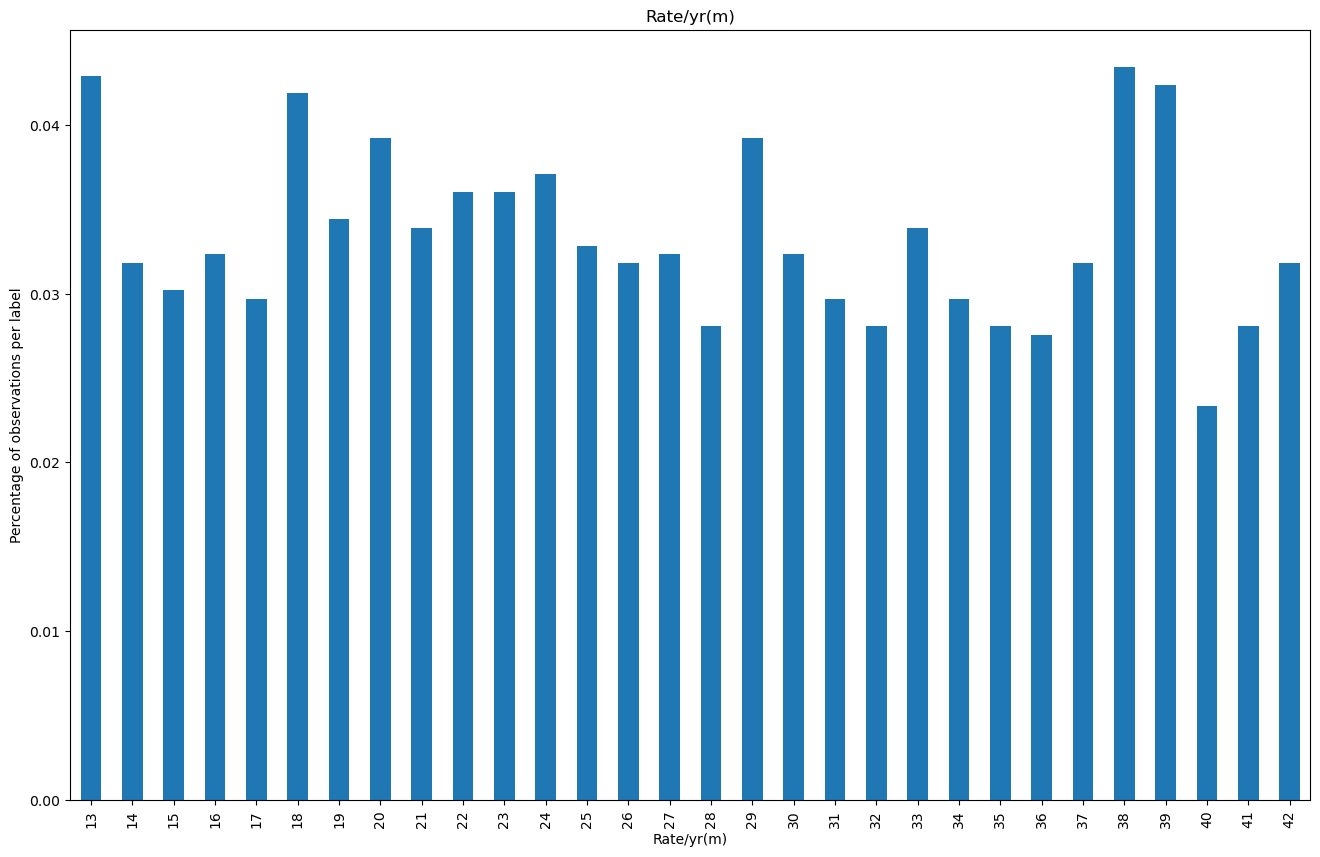

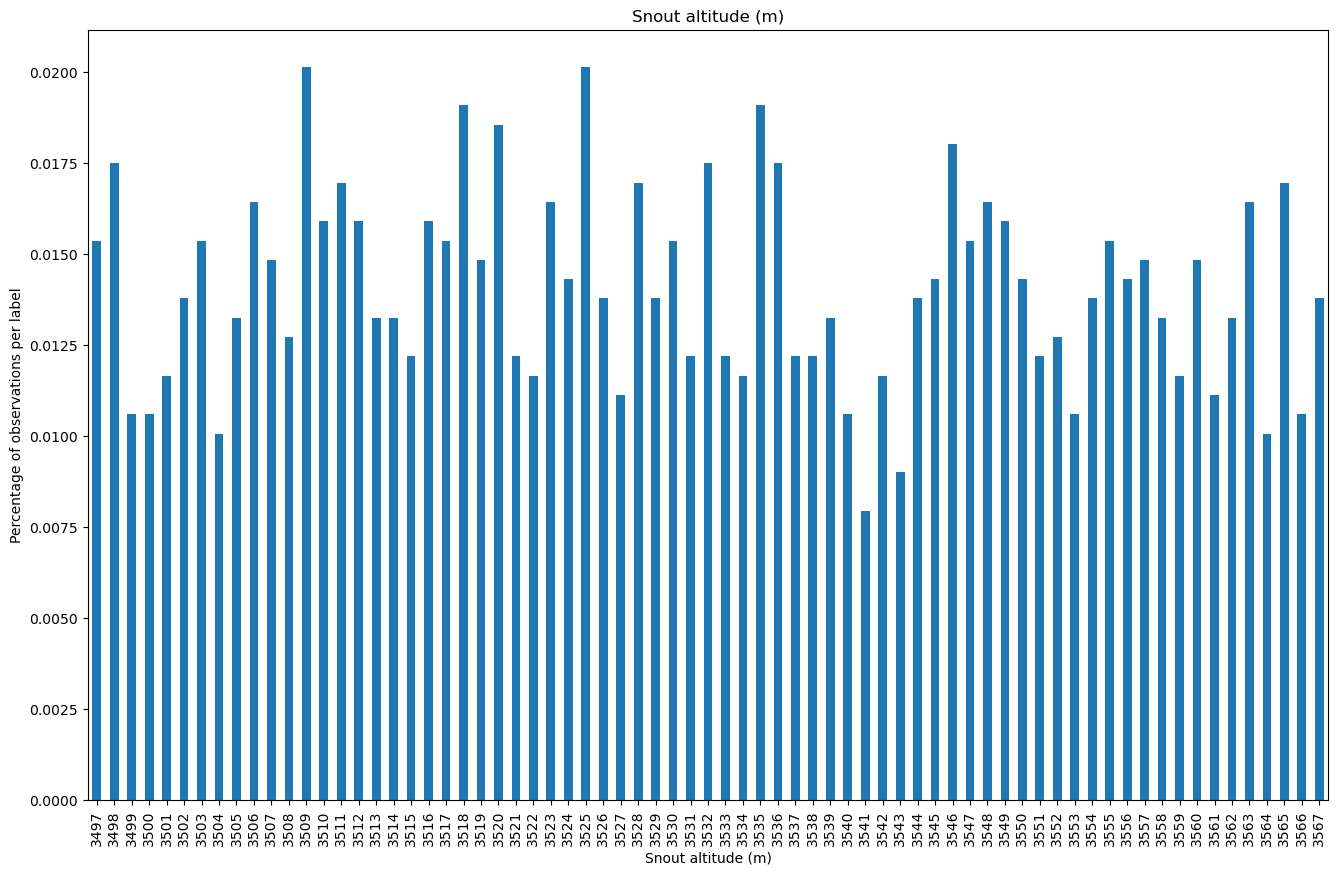

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()